<a href="https://colab.research.google.com/github/kookie14/Numerical-Method/blob/main/numerical_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = Yellow >Chương 2: Giai phuong trinh 1 bien </font>

* Fixed-point Iteration

In [ ]:
import numpy as np

def g(p):
    return((3*p**2+3)**(1/4))

Tol = 10**(-2)
N0 = 10
p0 = 1
i = 1

while i<= N0:
    p = g(p0)
    FP = g(p)
    if np.abs(p-p0)< Tol:
        print("p = "+str(p)+ " after "+str(i)+" iterations")
        break
    i = i+1
    print(p)
    p0 = p
if i > N0: 
    print("Method failed after " + str(N0)+ " iterations")

1.5650845800732873
1.79357287863573
1.8859437430173158
1.9228478439840826
1.9375075399574273
p = 1.9433169298986768 after 6 iterations


* Newton's Method

In [ ]:
def newtonsmethod(p0, n, tol):
    def f(p):
        return((3*p**2+3)**(1/4))

    def df(p):
        return(3/2*p*((3*p**2+3)**(-3/4)))
    i = 1
    while i <= n:
        p = p0 - (f(p0)/df(p0))
        if abs(p- p0) < tol:
            print("x = "+str(p)+ " after "+str(i)+" iterations")
            break
        i =i+1
        print(p)
        p0 = p
    if i > n: 
        print("Method failed after " + str(n)+ " iterations")

newtonsmethod(1, 10, 10**(-2))

-3.0
3.666666666666667
-4.212121212121213
4.6869413560061055
-5.113658877751304
5.504768266901541
-5.868089646300087
6.20891606861983
-6.531033484590083
6.837263732026262
Method failed after 10 iterations


* Secant Method

In [ ]:
from math import cos
# apply with f  = cosx - x
def secantMethod(p0, p1, tol, n):
    def f(x):
        return cos(x) - x
    i = 2
    q0 = f(p0)
    q1 = f(p1)
    while i <= n:
        p = p1 - q1*(p1-p0)/(q1-q0)
        if abs(p-p1) < tol:
            print("x = "+ str(p)+ " after " + str(i) + " iterations")
            break
        i = i+1
        print(p)
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    if i > n: 
        print("Method failed after " + str(n)+ " iterations")

## ví dụ
        
secantMethod(0,3.14/2, 10**(-2), 10)

0.6110842890046084
0.7232860813113391
0.7395663230305634
x = 0.7390834410483108 after 5 iterations


* False Position Method

In [ ]:
from math import cos
# apply with f  = cosx - x
def flasePosition(p0, p1, tol, n):
    def f(x):
        return cos(x) - x
    i = 2
    q0 = f(p0)
    q1 = f(p1)
    while i <= n:
        p = p1 - q1*(p1-p0)/(q1-q0)
        print(p)
        if abs(p-p1) < tol:
            print("x = "+ str(p)+ " after " + str(i) + " iterations")
            break
        i = i+1
        q = f(p)
        if(q*q1 < 0):
            p0 = p1
            q0 = q1
        p1 = p
        q1 = q
    if i > n: 
        print("Method failed after " + str(n)+ " iterations")
# ví dụ
flasePosition(0,3.14/2, 10**(-2), 10)
        

0.6110842890046084
0.7232860813113391
0.737268633985274
0.7388781713239154
x = 0.7388781713239154 after 5 iterations


# <font color = yellow>Chương 3: Giai phương trình nhiều biến </font>



 * Phương pháp khử Gauss

In [ ]:
def gaussy(A, b, n):
    l = [0 for x in range(n)]
    s = [0.0 for x in range(n)]
    for i in range(n):
        l[i] = i
        smax = 0.0
        for j in range(n):
            if abs(A[i][j]) > smax:
                smax = abs(A[i][j])
        s[i] = smax

    for i in range(n - 1):
        rmax = 0.0
        for j in range(i, n):
            ratio = abs(A[l[j]][i]) / s[l[j]]
            if ratio > rmax:
                rmax = ratio
                rindex = j
        temp = l[i]
        l[i] = l[rindex]
        l[rindex] = temp
        for j in range(i + 1, n):
            multiplier = A[l[j]][i] / A[l[i]][i]
            for k in range(i, n):
                A[l[j]][k] = A[l[j]][k] - multiplier * A[l[i]][k]
            b[l[j]] = b[l[j]] - multiplier * b[l[i]]

    x = [0.0 for y in range(n)]
    x[n - 1] = b[l[n - 1]] / A[l[n - 1]][n - 1]
    for j in range(n - 2, -1, -1):
        summ = 0.0
        for k in range(j + 1, n):
            summ = summ + A[l[j]][k] * x[k]
        x[j] = (b[l[j]] - summ) / A[l[j]][j]

    print ("Nghiệm xấp xỉ [", end="")
    for i in range(n):
        if i != (n - 1):
            print(x[i], ",", end="")
        else:
            print(x[i], "].")

matrix0 = [[1, -1, 2 ,-1], [2,-2,3,-3],[1,1,1,0],[1,-1,4,3]]
vector0 = [-8,-20,-2,4]

matrix1 = [[3.0, 2.0, -5.0], [2.0, -3.0, 1.0], [1.0, 4.0, -1.0]]
vector1 = [0.0, 0.0, 4.0]

gaussy(matrix0, vector0, 4)
gaussy(matrix1, vector1, 3)

Nghiệm xấp xỉ [-6.999999999999998 ,2.999999999999999 ,1.9999999999999993 ,2.0000000000000004 ].
Nghiệm xấp xỉ [0.9999999999999999 ,1.0 ,1.0000000000000002 ].


* Phương pháp Gauss- Jordan

In [ ]:
import numpy as np

def swap(matrix, row,k):
	temp = matrix[k]
	if (k != (row-1)):
		matrix[k] = matrix[k+1]
		matrix[k+1] = temp
		normal(matrix,k,matrix[k][k],row+1)
		eliminate(matrix,k,row,row+1)

def normal(matrix,k, a,col):
	if (a!=0):
		for j in range(col):
			matrix[k][j] = matrix[k][j]/a
	else:
		swap(matrix,col-1,k)

def eliminate(matrix, k, row,col):
	for i in range(row):
		if (i!=k):
			b = matrix[i][k]
			for j in range(col):
				matrix[i][j] = matrix[i][j]-b*matrix[k][j]

## ví dụ:
matrix  = [[1, -1, 2 ,-1, -8], [2,-2,3,-3, -20],[1,1,1,0, -2],[1,-1,4,3, 4]]
row = 4
col = 5
for i in range(row):
  for j in range(col):
  	if(i==j):
  		      a = matrix[i][j]
	  	      normal(matrix,i,a,col)
	  	      eliminate(matrix,i,row,col)
for i in range(len(matrix)):
	print(matrix[i])


[1.0, 0.0, 0.0, 0.0, -7.0]
[0.0, 1.0, 0.0, 0.0, 3.0]
[-0.0, -0.0, 1.0, 0.0, 2.0]
[0.0, 0.0, 0.0, 1.0, 2.0]



* Phương pháp Gauss-Seidel 

In [ ]:
import numpy as np

def gauss_seidel(A, b, x0, tol, K):
    
    x_iter = []
    n = A.shape[0]
    err = tol + 1
    x = x0.copy()
    k = 0
    
    while err > tol and k < K:
        
        xold = x.copy()
        x = gauss_iter(A, b, x)
        print(x)
        x_iter.append(x.copy())
        err = np.linalg.norm(x-xold, np.inf)/np.linalg.norm(x, np.inf)
        k = k+1
    
    return x, x_iter

def gauss_iter(A, b, x):
    
    n = A.shape[0]
    
    for i in range(n):
        s = 0
        for j in range(n):
            if j!=i:
                s += A[i,j]*x[j]
        x[i] = (-s +b[i])/A[i,i]
        
    return x


In [ ]:
A = np. array([[2., 1., 0., 0.],
               [2., 3.,  0., 1.],
               [0., -1., -6., 2.],
               [0., 2., 1., -4.]])

b = np. array([1., 0., -2., -5 ]) 

tol = 0.0001
K = 1000
x0 = np.zeros(4)
x, x_iter = gauss_seidel(A,b, x0, tol, K)
print(x)
print(x_iter)

[ 0.5        -0.33333333  0.38888889  1.18055556]
[ 0.66666667 -0.83796296  0.86651235  1.0476466 ]
[ 0.91898148 -0.96186986  0.84286051  0.9797802 ]
[ 0.98093493 -0.98055002  0.82335174  0.96556292]
[ 0.99027501 -0.98203765  0.81886058  0.96369632]
[ 0.99101882 -0.98191132  0.81821733  0.96359867]
[ 0.99095566 -0.98183666  0.81817233  0.96362475]
[ 0.99095566 -0.98183666  0.81817233  0.96362475]
[array([ 0.5       , -0.33333333,  0.38888889,  1.18055556]), array([ 0.66666667, -0.83796296,  0.86651235,  1.0476466 ]), array([ 0.91898148, -0.96186986,  0.84286051,  0.9797802 ]), array([ 0.98093493, -0.98055002,  0.82335174,  0.96556292]), array([ 0.99027501, -0.98203765,  0.81886058,  0.96369632]), array([ 0.99101882, -0.98191132,  0.81821733,  0.96359867]), array([ 0.99095566, -0.98183666,  0.81817233,  0.96362475])]


In [ ]:
def error(x_iter):
    errors = []
    for i in range(len(x_iter)):
        err = np.linalg.norm(A@x_iter[i] - b)
        errors.append(err)
    return errors     

In [ ]:
err = error(x_iter)

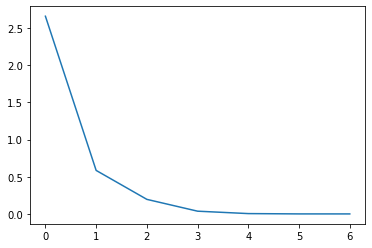

In [ ]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(x_iter))],err)

* phương pháp phân tích nhân tử LU (triển khai phương pháp Cholesky)

In [ ]:
import math
import numpy as np

MAX = 100;
 
def Cholesky_Decomposition(matrix, n, b):
 
    lower = [[0 for x in range(n + 1)]
                for y in range(n + 1)];
    L = [[0 for x in range(n)]
              for y in range(n )];

    # phân tích ma trận
    # thành ma trận tam giác dưới
    for i in range(n):
        for j in range(i+1):
            sum1 = 0;
            sum3 = 0;
            sum4 = 0;
 
            # tính tổng 
            if (j == i):
                for k in range(j):
                    sum1 += pow(lower[j][k], 2);
                lower[j][j] = float(math.sqrt(matrix[j][j] - sum1));
            else:
                 
                # Đánh giá L[i,j]
                # sử dụng L[j, j]
                for k in range(j):
                    sum1 += (lower[i][k] *lower[j][k]);
                if(lower[j][j] > 0):
                    lower[i][j] = float((matrix[i][j] - sum1) /
                                               lower[j][j]);
          
    print("Ma trận tam giác dưới\t\tMa trận chuyển vị");
    for i in range(n):
         
        # Ma trận tam giác dưới
        for j in range(n):
            print(lower[i][j], end = "\t");
            L[i][j] = lower[i][j]
        print("", end = "\t");
         
        # Ma trận chuyển vị của ma trận tam giác dưới
        for j in range(n):
            print(lower[j][i], end = "\t");
        print("");
    return L

def solver(L,U,b):
  L=np.array(L, float)
  U=np.array(U, float)
  b=np.array(b, float)

  n,_=np.shape(L)
  y=np.zeros(n)
  x=np.zeros(n)

# Giai PT Ly = b
  for i in range(n):
    sumj=0
    for j in range(i):
      sumj += L[i,j]*y[j]
    y[i]=(b[i]-sumj)/L[i,i]

# Gia Ux = y 
  for i in range(n-1, -1, -1):
    sumj=0
    for j in range(i+1,n):
      sumj += U[i,j] * x[j]
    x[i]=(y[i]-sumj)/U[i,i]
  return x


# ví dụ
n = 3;
matrix = [[4, 2, 14],
          [2, 17, -5],
          [14, -5, 83]];
b = [14, -101, 155]
L = Cholesky_Decomposition(matrix, n, b);
print(L)
U = np.transpose(L)
print(U)
print("Nghiệm x là: ")
print((solver(L,U,b)))


 

Ma trận tam giác dưới		Ma trận chuyển vị
2.0	0	0		2.0	1.0	7.0	
1.0	4.0	0		0	4.0	-3.0	
7.0	-3.0	5.0		0	0	5.0	
[[2.0, 0, 0], [1.0, 4.0, 0], [7.0, -3.0, 5.0]]
[[ 2.  1.  7.]
 [ 0.  4. -3.]
 [ 0.  0.  5.]]
Nghiệm x là: 
[ 3. -6.  1.]


* Phương pháp Jacobi 

In [ ]:
import numpy as np

In [ ]:
def jacobi(A,b, x0, tol, K):
    x_iter = []
    n = A.shape[0]
    err = tol + 1
    x = x0.copy()
    k = 0
    while err > tol and k < K:
        xold = x.copy()
        x = jacobiIter(A,b,xold)
        x_iter.append(x)
        k = k + 1
        err = np.linalg.norm(x-xold,np.inf)/np.linalg.norm(x,np.inf)
        #err = np.linalg.norm(x-xold,2)/np.linalg.norm(x,2)
    print(k)
    return x, x_iter



def jacobiIter(A,b,xold):

    n = A.shape[0]
    x = np.zeros_like(xold)
    for i in range(n):
        s = 0
        for j in range(n):
            if j!=i:
                s += A[i,j]*xold[j]
        x[i] = (b[i]- s)/A[i,i]
    return x

In [ ]:
A = np. array([[2., 1., 0., 0.],
               [2., 3.,  0., 1.],
               [0., -1., -6., 2.],
               [0., 2., 1., -4.]])

b = np. array([1., 0., -2., -5 ]) 

tol = 0.0001
K = 1000
x0 = np.zeros(4)
x, x_iter = jacobi(A,b, x0, tol, K)
print(x)
len(x_iter)

13
[ 0.9909161  -0.98183318  0.81816961  0.96364228]


13

In [ ]:
# Tinh lai b
A@x

array([ 9.99999014e-01, -2.50615319e-05, -1.99989992e+00, -5.00006589e+00])

In [ ]:
# Error plot
def error(x_iter):
    errors = []
    for i in range(len(x_iter)):
        err = np.linalg.norm(A@x_iter[i] - b)
        errors.append(err)
    return errors

In [ ]:
err = error(x_iter)
err[-1]

0.00012241745481077155

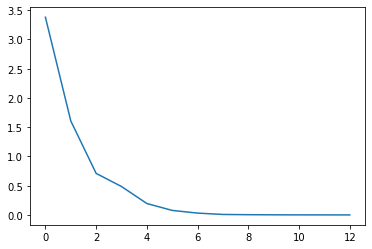

In [ ]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(x_iter))],err)

* Phương pháp lặp Gauss-Seidel

# Chương 4: Phương pháp nội suy

* Phương pháp nội suy Lagrange

In [ ]:
import numpy as np
def input_data():
    data_x = np.array([])
    data_y = np.array([])
    n = int(input("nhập số điểm:  "))

    for i in range(n):
        data_x = np.append(data_x, float(input("X[{}]: ".format(i))))

    for i in range(n):
        data_y = np.append(data_y, float(input("Y[{}]: ".format(i))))

    x = float(input("Tìm Y với X = "))

    return [data_x, data_y, x]

In [ ]:
def lagrange(data_x, data_y, x):
    y_ans = 0

    for i in range(data_x.size):
        p = data_y[i]
        for j in range(data_x.size):
            if i != j:
                p *= ((x - data_x[j]) / (data_x[i] - data_x[j]))
        y_ans += p

    return y_ans


In [ ]:
def test_lagrange():
  

    data_x, data_y, x = input_data()

    y_ans = lagrange(data_x, data_y, x)

    print("Phương pháp nội suy Lagrange:")
    print("F({}) = {}".format(x, y_ans))


    

In [ ]:
def f(x):
  return pow(2,x)
print(f(-6))
print(f(0))
print(f(6))
print(f(12))


0.015625
1
64
4096


In [ ]:
## ví dụ bài 1(phần bài tập)
test_lagrange()

nhập số điểm:  4
X[0]: -6
X[1]: 0
X[2]: 6
X[3]: 12
Y[0]: 0.015625
Y[1]: 1
Y[2]: 64
Y[3]: 4096
Tìm Y với X = -1
Phương pháp nội suy Lagrange:
F(-1.0) = 102.0419921875


* Phương pháp nội suy Newton

In [ ]:
def newton_divided_difference(data_x, data_y, x):
    c = np.copy(data_y)

    for j in range(1, data_x.size):
        for i in range(data_x.size - 1, j - 1, -1):
            c[i] = float(c[i] - c[i - 1]) / float(data_x[i] - data_x[i - j])

    y_ans = 0
    for i in range(data_x.size):
        f = c[i]
        for j in range(i):
            f *= (x - data_x[j])

        y_ans += f
        
    return y_ans

In [ ]:

def test_newton():
   
    data_x, data_y, x = input_data()

    y_ans = newton_divided_difference(data_x, data_y, x)

    print("Phương pháp nội suy Newton:")
    print("F({}) = {}".format(x, y_ans))

In [ ]:
## ví dụ bài 1 phần bài tập

test_newton()

nhập số điểm:  4
X[0]: 8.1
X[1]: 8.3
X[2]: 8.6
X[3]: .7
Y[0]: 16.94410
Y[1]: 17.56492
Y[2]: 18.50515
Y[3]: 18.82091
Tìm Y với X = 8.4
Phương pháp nội suy Newton:
F(8.4) = 17.877419978977976


* Phương pháp nội suy Spline



In [ ]:
# các biến toàn cục
global x, fx, h, k0, kn


In [ ]:
# tính đạo hàm bằng ma trận A*k = b
def calculate_K(k0, kn):
    delta_f = np.array([3/h[i]*(fx[i+1] - fx[i-1]) for i in range(1, fx.shape[0] - 1)])
    b = np.concatenate((np.array([k0]), delta_f, np.array([kn])), axis = 0)
    A = np.identity(fx.shape[0])
    for i in range(1, fx.shape[0]-1):
        A[i,i-1 : i+2] = np.array([1,4,1])
    k = np.linalg.inv(A).dot(b)
    return k

In [ ]:
# chuẩn hoá hàm pn(x)
def find_pj(k,j):
    '''pj(x) = aj0 + aj1*(x-xj) + aj2*(x-xj)^2 + aj3*(x-xj)^3'''
    aj0 = fx[j]
    aj1 = k[j]
    aj2 = (3/h[j]**2)*(fx[j+1] - fx[j]) - 1/h[j]*(k[j+1] + 2*k[j])
    aj3 = (2/h[j]**3)*(fx[j] - fx[j+1]) + (1/h[j]**2)*(k[j+1] + k[j])
    pj = ""
    aj = [aj0, aj1, aj2, aj3]
    for i in range(len(aj)):
        if aj[i] == 0:
            continue
        if x[j] != 0:
            if i == 0:
                pj += str(aj[i])
            elif i == 1:
                pj += "+{}*(x-{})".format(aj[i], x[j])
            else:
                pj += "+{}*(x-{})^{}".format(aj[i], x[j],i)    
        else :
            if i == 0:
                pj += str(aj[i])
            elif i == 1:
                pj += "+{}*x".format(aj[i])
            else:
                pj += "+{}*x^{}".format(aj[i],i) 
    return pj.replace("--", "+").replace("+-", "-").strip().strip("+").replace("1.0*", "")\
        .replace("+", " + ").replace("-", " - ").strip()


In [ ]:
# tìm pn(x)
def find_pn(x,fx):
    pn = []
    k = calculate_K(k0,kn)
    for i in range(x.shape[0]-1):
        pn.append(find_pj(k,i))
    
    return pn

In [ ]:
# plot and compare
def draw(x1, x2, y:str, color = "blue"):
    x = np.linspace(x1,x2,1000)
    y = eval(y.replace("^", "**")) 
    plt.plot(x,y, color = color)

ví dụ:<font color = yellow> bài 4d: </font>

p0(x) = 0.8619948 + 1.4642127679999999*(x + 1.0)^2 - 2.1602232159999994*(x + 1.0)^3
p1(x) = 0.95802009 - 0.15595464399999975*(x + 0.5) - 1.7761220560000002*(x + 0.5)^2 + 5.300800368*(x + 0.5)^3
p2(x) = 1.0986123 + 2.043523576*x + 6.175078495999998*x^2 - 18.958136095999997*x^3


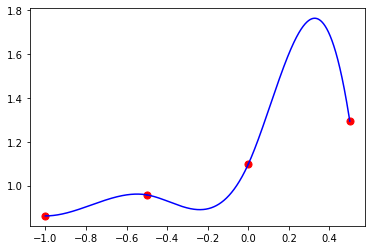

In [ ]:
x = np.array([-1,-0.5,0,0.5])
fx = np.array([0.86199480,0.95802009,1.0986123,1.2943767])
h = np.diff(x) # tính hiệu khoảng cách của 2 giá trị x liên tiếp
k0 = 0
kn = -6
pn_x = find_pn(x,fx)
#  vẽ
plt.scatter(x,fx, c = "red", s = 50)
for i in range(len(pn_x)):
    print("p{}(x) = {}".format(i,pn_x[i]))
    draw(x1 = x[i], x2 = x[i+1], y = pn_x[i])

<font color = yellow> VD1: </font> ho n= [0 to 2] với x0=-1, x1=0, x2=1 và f(x0)=f0= 1, f(x1)=f1= 0, f(x2)=f2=1 
g’(-1)=f’(-1)= k0 = -4, g’(1) = f’(1) = k2 = 4. Tìm xt = 2


In [ ]:
x = np.array([-1,0,1])
fx = np.array([1,0,1])
h = np.diff(x)
k0 = -4
kn = 4
pn_x = find_pn(x,fx)
plt.scatter(x,fx, c = "black", s = 50)
for i in range(len(pn_x)):
    print("p{}(x) = {}".format(i,pn_x[i]))
    draw(x1 = x[i], x2 = x[i+1], y = pn_x[i])
    
# vẽ đối chiếu với hàm gốc
y = "x^4"
draw(x1 = x[0], x2 = x[-1], y = y, color = "red")

# Chương 5: Tính gần đúng đạo hàm và tích phân

* Tính gần đúng đạo hàm

  Công thức 3 điểm: Với x = [x0,x1,..,xn] và fx = [fx0, fx1,...,fxn] và x1 - x0 = x2 - x1 = ... = xn - x(n-1) = h

      f'0(x) = 1/(2h)*(-3f0(x) + 4f1(x) - f2(x))

      f'i(x) = 1/(2h)*(-fi-1(x) + fi+1(x)) với  i = 1,2,...,n-1

      f'n(x) = 1/(2h)*(fn-2(x) - 4fn-1(x) + 3fn(x))


In [ ]:
def threePoint(x,f,h):
    df = []
    for i in range(x.shape[0]):
        if i == 0:
            df.append(1/(2*h)*(-3*f[i] + 4*f[i+1] - f[i+2]))
        elif i == x.shape[0] - 1:
            df.append(1/(2*h)*(f[i-2] - 4*f[i-1] + 3*f[i]))
        else:
            df.append(1/(2*h)*(f[i+1] - f[i-1]))
    return np.array(df)

In [ ]:
def val_f(x):
    '''giá trị của hàm số f tại điểm x'''
    return eval("x*exp(x)".replace("^", "**"))

def val_df(x):
    '''giá trị đạo hàm của hàm số f tại điểm x'''
    return eval("exp(x) + x*exp(x)".replace("^", "**"))

def threePoint_endPoint_formula(x0, f, h):
    return 1/(2*h)*(-3*f(x0) + 4*f(x0+h) - f(x0 + 2*h))

def threePoint_midPoint_formula(x0, f, h):
    return 1/(2*h)*(f(x0 + h) - f(x0 - h))

def fivePoint_midPoint_formula(x0, f, h):
    return 1/(12*h)*(f(x0 - 2*h) - 8*f(x0 - h) + 8*f(x0 + h) - f(x0 + 2*h))

def fivePoint_endPoint_formula(x0, f, h):
    return 1/(12*h)*(-25*f(x0) + 48*f(x0 + h) - 36*f(x0 + 2*h) + 16*f(x0 + 3*h) - 3*f(x0 + 4*h))


* Tính đạo hàm tại 1 điểm

In [ ]:
def val_f(x):
    '''giá trị của hàm số f tại điểm x'''
    return eval("x*exp(x)".replace("^", "**"))

def val_df(x):
    '''giá trị đạo hàm của hàm số f tại điểm x'''
    return eval("exp(x) + x*exp(x)".replace("^", "**"))

def three_midpoint_differentiate(f, x0, h):
        return (f(x0+h)-f(x0-h))/(2*h)

def threePoint_midPoint_formula(x0, f, h):
    return 1/(2*h)*(f(x0 + h) - f(x0 - h))

def fivePoint_midPoint_formula(x0, f, h):
    return 1/(12*h)*(f(x0 - 2*h) - 8*f(x0 - h) + 8*f(x0 + h) - f(x0 + 2*h))

def fivePoint_endPoint_formula(x0, f, h):
    return 1/(12*h)*(-25*f(x0) + 48*f(x0 + h) - 36*f(x0 + 2*h) + 16*f(x0 + 3*h) - 3*f(x0 + 4*h))


* ví dụ

In [ ]:
import numpy as np
from math import *

In [ ]:
x = np.array([1.1, 1.2, 1.3, 1.4])
y = np.array([1.5291, 1.64024, 1.70470, 1.71277])
h = np.diff(x)[0]
df = threePoint(x,y,h)
print(f'Đạo hàm gần đúng là: {df}')

Đạo hàm gần đúng là: [ 1.3448   0.878    0.36265 -0.20125]


In [ ]:
import math
x0 = 2
h = 0.1 # bước nhảy của các giá trị x
print("Giá trị của hàm số tại x = {} là: f({}) = {}".format(x0,x0,val_f(x0)))
print("Đạo hàm của hàm số tại x = {} là: df({}) = {}".format(x0,x0,val_df(x0)))
print("Đạo hàm gần đúng hàm số tại x = {} là:".format(x0))
print("threePoint endPoint formula:", threePoint_endPoint_formula(x0, val_f, h))
print("threePoint midPoint formula:", threePoint_midPoint_formula(x0, val_f, h))
print("fivePoint endPoint formula:", fivePoint_endPoint_formula(x0, val_f, h))
print("fivePoint midPoint formula:", fivePoint_midPoint_formula(x0, val_f, h))

Giá trị của hàm số tại x = 2 là: f(2) = 14.7781121978613
Đạo hàm của hàm số tại x = 2 là: df(2) = 22.16716829679195
Đạo hàm gần đúng hàm số tại x = 2 là:
threePoint endPoint formula: 22.03230486614652
threePoint midPoint formula: 22.228786880307297
fivePoint endPoint formula: 22.165914568055193
fivePoint midPoint formula: 22.166995621399924


* Tích phân gần đúng

In [ ]:
import math
def equation1():
    f = lambda x: x**3
    return f

def equation2():
    f = lambda x: (1+(4*x**2))**(0.5)
    return f

def equation3():
    f = lambda x: math.exp(-1*x**2)
    return f

def equation4():
    f = lambda x: (math.sin(x))/x
    return f

#midpoint rule
def midpoint(f, a, b, n): 
    h = float(b-a)/n #finding midpoint
    result = 0
    
    for _ in range(n):
        result += f((a + h/2.0)) #adding all the f(x)
        a += h
    result *= h #multiplying with the midpoint
    return result

#trapezoid rule
def trapezoid(f, a, b, n):
    h = (b-a)/float(n) #finding midpoint
    result = f(a) + f(b) #find the f(a) and f(b) 

    for i in range(1,n,1):
        result = result + (2*(f(a + i*h))) #finding 2*f(x)
    result *= (h/2.0) #multiplying with dx/2.0

    return result

#simpson's rule
def simpson(f, a, b, n):
    h = (b-a)/float(n)
    result = f(a) + f(b)

    for i in range(1,n,1):
        if(i%2 ==0):
            result = result + (2*(f(a + i*h)))
        else:
            result = result + (4*(f(a + i*h)))
    result *= (h/3.0)

    return result
def main():
    
    try:
        print("\n 1: x^3\n 2: (1+(4x^2))^(1/2)\n 3: e^(-x^2)\n 4: (sin(x))/x\n")
        response = input("Chọn phương trình ví dụ\nBấm 'q' để dừng chương trình:  ")

        while(response != "q"):

            response = int(response)

            a = int(input("\nNhập 'a': "))
            b = int(input("\nNhập 'b': "))
            n = int(input("\nNhập'n': "))

            if(0<response<5):

                print("\n%-4s %-15s %-15s %-15s\n" % ("n", "Midpoint Rule", "Trapezoid Rule", "Simpson's Rule"))

                for index in range(2,(n+1),2):
                    if(response == 1):
                        ansMid = midpoint(equation1(), a, b, index)
                        ansTrap = trapezoid(equation1(), a, b, index)
                        ansSim = simpson(equation1(),a,b,index)

                    elif(response == 2):
                        ansMid = midpoint(equation2(), a, b, index)
                        ansTrap = trapezoid(equation2(), a, b, index)
                        ansSim = simpson(equation2(),a,b,index)

                    elif(response == 3):
                        ansMid = midpoint(equation3(), a, b, index)
                        ansTrap = trapezoid(equation3(), a, b, index)
                        ansSim = simpson(equation3(),a,b,index)

                    elif(response == 4):
                        ansMid = midpoint(equation4(), a, b, index)
                        ansTrap = trapezoid(equation4(), a, b, index)
                        ansSim = simpson(equation4(),a,b,index)

                    print("%-4i %-15.4f %-15.4f %-15.4f\n" % (index, ansMid, ansTrap, ansSim))

            else:
                print("Nhâp sai")

            print("\n 1: x^3\n 2: (1+(4x^2))^(1/2)\n 3: e^(-x^2)\n 4: (sin(x))/x\n")
            response = input("Chọn phương trình ví dụ\nBấm 'q' để dừng chương trình: ")

    except ValueError:
        print("\nError: Vô nghiệm!\n")
    

if __name__ == "__main__":
    main()


 1: x^3
 2: (1+(4x^2))^(1/2)
 3: e^(-x^2)
 4: (sin(x))/x

Chọn phương trình ví dụ
Bấm 'q' để dừng chương trình:  1

Nhập 'a': -1

Nhập 'b': 1

Nhập'n': 10

n    Midpoint Rule   Trapezoid Rule  Simpson's Rule 

2    0.0000          0.0000          0.0000         

4    0.0000          0.0000          0.0000         

6    -0.0000         -0.0000         -0.0000        

8    0.0000          0.0000          0.0000         

10   -0.0000         0.0000          0.0000         


 1: x^3
 2: (1+(4x^2))^(1/2)
 3: e^(-x^2)
 4: (sin(x))/x

Chọn phương trình ví dụ
Bấm 'q' để dừng chương trình: q


# Chương 6: Phương pháp bình phương tối thiểu

In [ ]:
def find_M(x:np, degree, decimals = 5):
    M = np.zeros((degree + 1, degree + 1), dtype = np.float32)
    for row in range(0, degree + 1):
        for col in range(row, degree + 1):
            M[row, col] = M[col, row] =  np.round(np.sum(np.power(x,row + col)), decimals= decimals)
    return M

In [ ]:
def find_N(x: np, y: np, degree, decimals = 5):
    N = np.zeros(degree + 1)
    for col in range(N.shape[0]):
        N[col] = np.sum(y*np.power(x,col)) 
    return N

Hiển thị hàm fx

In [ ]:
def normalization_fx(y):
    for (i,ai) in enumerate(y):
        coef = ai.split("_")[0]
        if float(coef) == 0:
            y.remove(ai)
        else:
            y[i] = ai.replace("_", "")
    return " + ".join(y).replace("+ -", "- ")

In [ ]:
def fx(a: np):
    y = []
    for (i,ai) in enumerate(a):
        if i == 0:
            y.append(str(ai))
        elif i == 1: 
            y.append(str(ai) + "_*x")
        else:
            y.append(str(ai) + "_*x^" + str(i))
    y = normalization_fx(y)
    return y

In [ ]:
def draw(x,y, f):
    plt.scatter(x,y, s = 30, c = "r")
    
    x = np.arange(x[0] - 1, x[-1] + 1, 0.001)
    y = eval(f.replace("^", "**"))
    plt.plot(x,y, label = "f(x)")
    plt.title("Đồ thị xấp xỉ")
    plt.legend()

In [ ]:
def main(x, y, degree, decimals = 5):
    
    M = find_M(x,degree)
    N = find_N(x,y,degree)
    a = np.round(np.linalg.inv(M).dot(N), decimals)
    f =  fx(a)
    draw(x,y,f)
    print("f(x) =",f)

* ví dụ

In [ ]:
import matplotlib.pyplot as plt

f(x) = 1.00514 + 0.86414*x + 0.8437*x^2


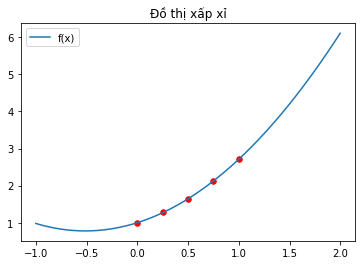

In [ ]:
x = np.array([0, 0.25, 0.5, 0.75, 1])
y = np.array([1,1.284, 1.6487, 2.1170, 2.7183])
degree = 2 # bậc của hàm số
decimals = 5 # làm tròn sau dấu phảy
main(x, y, degree, decimals)

f(x) = 0.40669 + 1.15484*x + 0.03485*x^2


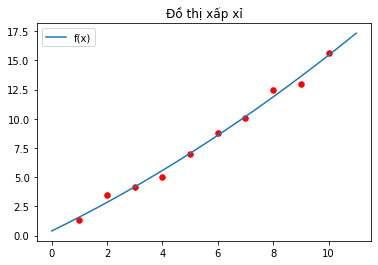

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1.3, 3.5, 4.2, 5.0, 7.0, 8.8, 10.1, 12.5, 13, 15.6])
degree = 2
decimals = 5
main(x, y, degree, decimals)

* Xấp xỉ bình phương liên tục

In [ ]:
def val_f(func,x):
    return eval(func.replace("^", "**"))

In [ ]:
def simpson_rule(x, h, f_func, val_f):
    sum = 0
    for i in range(x.shape[0]):
        if i == 0 and i == x.shape[0] - 1:
            sum += val_f(f_func, x[i])
        elif i % 2 == 0:
            sum += 2*val_f(f_func, x[i])
        else:
            sum += 4*val_f(f_func, x[i])
    
    return h/3*sum

Xấp xỉ hàm số f(x) thành đa thức P(x) = a0 + a1*x + a2*x^2 + ... + an*x^n 
+ Tích phân đi từ a -> b của (x^i)*P(x) = tích phân đi từ a -> b của (x^i)*f(x) với i = 0, 1, ..., n
+ với i = 0, 1, ..., n ta được ma trận A*coef = y
+ Với A là ma trận (n+1)x(n+1) và coef là ma trận hệ số a = [a0, a1, ..., an] và y là ma trận tích phân các giá trị của hàm (x^i)*f(x)

In [ ]:
def print_function(coef):
    Px = ""
    for i in range(coef.shape[0]):
        if i == 0 and coef[i] != 0:
            Px += "{} + ".format(coef[i])
        elif i == coef.shape[0] -1 and coef[i] != 0:
            Px += "{}*x^{} ".format(coef[i], i)
        elif i == coef.shape[0] -1 and coef[i] == 0:
            Px = Px.strip().strip("+")
        elif coef[i] != 0:
            Px += "{}*x^{} + ".format(coef[i], i)
    Px = Px.replace("^1 ", " ")
    print("P(x) =", Px)
    return Px

In [ ]:
def draw_func(a,b, fx, Px, step = 0.01):
    plt.style.use("seaborn-whitegrid")
    x = np.arange(a, b, step)
    val_fx = val_f(fx, x)
    val_Px = val_f(Px, x)
    plt.plot(x, val_fx, label = "f(x)")
    plt.plot(x, val_Px, label = "P(x)")
    plt.legend()
    plt.title("Xấp xỉ hàm số bằng hàm trực giao")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")

In [ ]:
def main(f_func, a, b, degree, d_decimals = 4):
    #  các tham số của cần thiết cho công thức Simpson
    n = 100
    h = (b-a)/(2*n)
    x = a + np.arange(0, 2*n + 1)*h

    A = np.zeros((degree + 1, degree + 1))
    for i in range(A.shape[0]):
        for j in range(i,A.shape[1]):
            A[i,j] = A[j, i] = simpson_rule(x,h,"x^{}".format(i + j), val_f)
            
    A = np.round(A, d_decimals)
    
    y = np.zeros(degree + 1)
    for i in range(y.shape[0]):
        new_func = "(" + f_func + ")*x^{}".format(i)
        y[i] = simpson_rule(x, h, new_func, val_f)
    
    coef = np.round(y.dot(np.linalg.inv(A)), d_decimals)
    
    Px = print_function(coef)
    draw_func(a, b, f_func, Px)
    # return coef

* ví dụ

P(x) = 1.834 + 3.9997*x 


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7881 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7921 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 7845 missing from current font.
  font.set_text(s

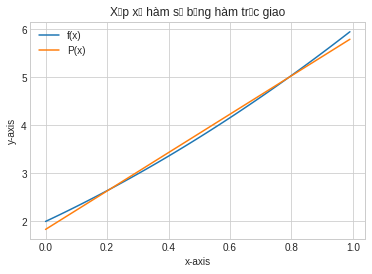

In [ ]:
if __name__ == "__main__":
    a,b = 0, 1 # khoảng làm tròn của tích phân
    f_func = "x^2 + 3*x +2"    
    degree = 1 # bậc của phương trình cần xấp xỉ
    d_decimals = 4
    main(f_func, a, b, degree)

In [ ]:
if __name__ == "__main__":
    a,b = -1, 1 # khoảng làm tròn của tích phân
    f_func = "1/2*cos(x) + 1/3*sin(2*x)"    
    degree = 3 # bậc của phương trình cần xấp xỉ
    d_decimals = 4
    main(f_func, a, b, degree)

# Chương 7: Các phương pháp tính phương trình gần đúng

* Phương pháp euler

In [ ]:
from math import *
import numpy as np
from prettytable import PrettyTable

In [ ]:
def f(x):
    return np.round(np.sqrt(2*x + 1), 5)

In [ ]:
def df(x, y):
    return y - 2*x/y

+ ví dụ 1

In [ ]:
x = [0]
y = [1] 
dy = [df(x[-1], y[-1])] # đạo hàm tai (xi,yi)
half_dy = [] # giá trị df_i+1/2
half_y = [] # y_i+1/2
half_x = [] # x_i+1/2
h = 0.2
it = 10
for i in range(it):
    half_x.append(x[-1] + h/2)
    half_y.append(y[-1] + h/2*dy[-1])
    half_dy.append(df(half_x[-1], half_y[-1]))
    x.append(x[-1] + h)
    y.append(y[-1] + h*half_dy[-1])
    dy.append(df(x[-1], y[-1]))
    

In [ ]:
table = PrettyTable()
table.add_column("i", range(it))
table.add_column("x", np.round(x[:-1], 5))
table.add_column("y", np.round(y[:-1],5))
table.add_column("f_i", np.round(dy[:-1],5))
table.add_column("f_(i+1/2)", np.round(half_dy,5))
table.add_column("y_(i+1/2)", np.round(half_y, 5))
table.add_column("y_(i+1)", np.round(y[1:], 5))
table.add_column("f(x)", f(np.array(x[:-1])))
print(table)

+---+-----+---------+---------+-----------+-----------+---------+---------+
| i |  x  |    y    |   f_i   | f_(i+1/2) | y_(i+1/2) | y_(i+1) |   f(x)  |
+---+-----+---------+---------+-----------+-----------+---------+---------+
| 0 | 0.0 |   1.0   |   1.0   |  0.91818  |    1.1    | 1.18364 |   1.0   |
| 1 | 0.2 | 1.18364 | 0.84569 |   0.7951  |  1.26821  | 1.34266 | 1.18322 |
| 2 | 0.4 | 1.34266 | 0.74682 |  0.71179  |  1.41734  | 1.48501 | 1.34164 |
| 3 | 0.6 | 1.48501 | 0.67694 |  0.65106  |  1.55271  | 1.61522 | 1.48324 |
| 4 | 0.8 | 1.61522 | 0.62465 |  0.60479  |  1.67769  | 1.73618 | 1.61245 |
| 5 | 1.0 | 1.73618 | 0.58423 |  0.56871  |  1.79461  | 1.84992 | 1.73205 |
| 6 | 1.2 | 1.84992 | 0.55257 |  0.54048  |  1.90518  | 1.95802 | 1.84391 |
| 7 | 1.4 | 1.95802 |  0.528  |  0.51889  |  2.01082  |  2.0618 | 1.94936 |
| 8 | 1.6 |  2.0618 | 0.50976 |  0.50352  |  2.11277  |  2.1625 | 2.04939 |
| 9 | 1.8 |  2.1625 | 0.49776 |  0.49459  |  2.21228  | 2.26142 | 2.14476 |
+---+-----+-

+ ví dụ 2

x_n	    y_n
0.0 	 0.000000
0.25 	 0.000000
0.5 	 0.062500
0.75 	 0.218750
1.0 	 0.515625


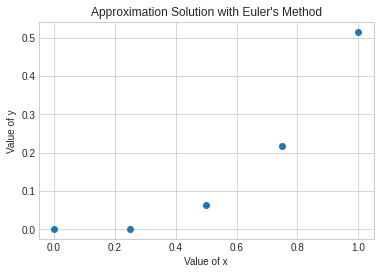

In [ ]:
x0 = 0
y0 = 0
xf = 1
n = 5
deltax = (xf-x0)/(n-1)
x = np.linspace(x0,xf,n)

def f(x,y):
	return x+2*y

y = np.zeros([n])
y[0] = y0

for i in range(1,n):
	y[i] = deltax*f(x[i-1],y0) + y0
	y0 = y[i]

print("x_n\t    y_n")
for i in range(n):
	print(x[i],"\t",format(y[i],'6f'))

plt.plot(x,y,'o')
plt.xlabel("Value of x")
plt.ylabel("Value of y")
plt.title("Approximation Solution with Euler's Method")
plt.show()

+ ví dụ 3

x_n	   py_n	           y_n
0.0 	    nan 	 2.000000
0.1 	 2.200000 	 2.205000
0.2 	 2.415500 	 2.421025
0.30000000000000004 	 2.643128 	 2.649233
0.4 	 2.884156 	 2.890902
0.5 	 3.139992 	 3.147447
0.6000000000000001 	 3.412191 	 3.420429
0.7000000000000001 	 3.702472 	 3.711574
0.8 	 4.012731 	 4.022789
0.9 	 4.345068 	 4.356182
1.0 	 4.701800 	 4.714081


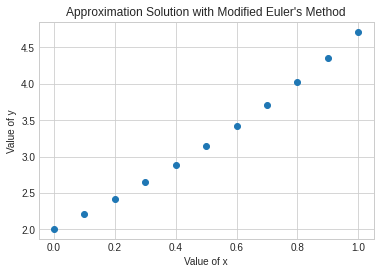

In [ ]:
x0 = 0
y0 = 2
xf = 1
n = 11
deltax = (xf-x0)/(n-1)
x = np.linspace(x0,xf,n)
def f(x,y):
	return y-x

y = np.zeros([n])
y[0] = y0
py = np.zeros([n])
py[0] = None

for i in range(1,n):
	py[i] = deltax*f(x[i-1],y[i-1]) + y[i-1]
	y[i] = deltax/2*( f(x[i],py[i]) + f(x[i-1],y[i-1]) ) + y[i-1]
print("x_n\t   py_n\t           y_n")
for i in range(n):
	print (x[i],"\t",format(py[i],'6f'),"\t",format(y[i],'6f'))

plt.plot(x,y,'o')
plt.xlabel("Value of x")
plt.ylabel("Value of y")
plt.title("Approximation Solution with Modified Euler's Method")
plt.show()

* Phương pháp Rough-Kutta bậc 4

In [ ]:
def f(x):
    return np.round(1/5*x*np.exp(3*x) - 1/25*np.exp(3*x) + 1/25*np.exp(-2*x), 5)

In [ ]:
def dy(x, y):
    return x*exp(3*x) - 2*y

In [ ]:
y = [0] # khai báo y0
x = [0] 
h = 0.1
it = 10 # số vòng lặp

k1 = []
k2 = []
k3 = []
k4 = []
delta_y = []

In [ ]:

for i in range(it):
    ki_1 =  h*dy(x[-1], y[-1])
    ki_2 = h*dy(x[-1] + h/2, y[-1] + ki_1/2)
    ki_3 = h*dy(x[-1] + h/2, y[-1] + ki_2/2)
    ki_4 = h*dy(x[-1] + h, y[-1] + ki_3)
    
    delta_yi = 1/6*(ki_1 + 2*ki_2 + 2*ki_3 + ki_4)    
    
    k1.append(ki_1)
    k2.append(ki_2)
    k3.append(ki_3)
    k4.append(ki_4)
    delta_y.append(delta_yi)
    
    y.append(y[-1] + delta_yi)
    x.append(x[-1] + h)



In [ ]:
x = np.round(x,3)
y = np.round(y, 5)
k1 = np.round(k1, 5)
k2 = np.round(k2, 5)
k3 = np.round(k3, 5)
k4 = np.round(k4, 5)
delta_y = np.round(delta_y, 5)


In [ ]:
dat_dtype = {
    'names' : ("x", "y", "k1", "k2", "k3", "k4", "delta_y", "y_i+1"),
    'formats' : ("float", "float", "float",  "float",  "float", "float",  "float",  "float")}

table = PrettyTable()
table.add_column("x", x[:-1])
table.add_column("y", y[:-1])
table.add_column("k1", k1)
table.add_column("k2", k2)
table.add_column("k3", k3)
table.add_column("k4", k4)
table.add_column("delta_y", delta_y)
table.add_column("y_i+1", y[1:])

print(table)

+-----+---------+---------+---------+---------+---------+---------+---------+
|  x  |    y    |    k1   |    k2   |    k3   |    k4   | delta_y |  y_i+1  |
+-----+---------+---------+---------+---------+---------+---------+---------+
| 0.0 |   0.0   |   0.0   | 0.00581 | 0.00523 | 0.01245 | 0.00575 | 0.00575 |
| 0.1 | 0.00575 | 0.01235 | 0.02114 | 0.02026 | 0.03124 | 0.02106 | 0.02682 |
| 0.2 | 0.02682 | 0.03108 | 0.04445 | 0.04312 |  0.0598 | 0.04434 | 0.07116 |
| 0.3 | 0.07116 | 0.05956 | 0.07983 |  0.0778 | 0.10301 | 0.07964 |  0.1508 |
| 0.4 |  0.1508 | 0.10265 | 0.13316 | 0.13011 |  0.1679 | 0.13285 | 0.28364 |
| 0.5 | 0.28364 | 0.16736 | 0.21292 | 0.20836 | 0.26458 | 0.21242 | 0.49606 |
| 0.6 | 0.49606 | 0.26377 | 0.33128 | 0.32453 | 0.40751 | 0.33048 | 0.82654 |
| 0.7 | 0.82654 | 0.40632 | 0.50564 | 0.49571 |  0.6174 |  0.5044 | 1.33094 |
| 0.8 | 1.33094 | 0.61567 | 0.76085 | 0.74633 | 0.92372 | 0.75896 |  2.0899 |
| 0.9 |  2.0899 |  0.9212 | 1.13224 | 1.11114 | 1.36835 | 1.1293

* Phương pháp cải tiến thứ 2 - Huen Method

In [ ]:
def f(x):
    return np.round(np.sqrt(2*x + 1), 5)
def df(x, y):
    return y - 2*x/y

In [ ]:
x = [0]
y = [1]
dy = [df(x[-1], y[-1])]
h = 0.2
y_tmp = [] # giá trị tham số trung gian y_i+1 = yi + h*df(xi,yi)
dy_tmp = [] # giá trị tham số trung gian dy(x_i+1, y_tmp[-1])
it = 10
for i in range(it):
    y_tmp.append(y[-1] + h*dy[-1])
    x.append(x[-1] + h)
    dy_tmp.append(df(x[-1], y_tmp[-1]))
    y.append(y[-1] + h*(dy[-1] + dy_tmp[-1])/2)
    dy.append(df(x[-1], y[-1]))

In [ ]:
table = PrettyTable()
table.add_column("i", range(it))
table.add_column("x", np.round(x[:-1], 5))
table.add_column("y", np.round(y[:-1],5))
table.add_column("dy(xi,yi)", np.round(dy[:-1],5))
table.add_column("y_tmp(i+1)", np.round(y_tmp,5))
table.add_column("dy_tmp(x(i+1),y_tmp(i+1))", np.round(dy_tmp,5))
table.add_column("y_(i+1)", np.round(y[1:], 5))
table.add_column("f(x)", f(np.array(x[:-1])))

print(table)

+---+-----+---------+-----------+------------+---------------------------+---------+---------+
| i |  x  |    y    | dy(xi,yi) | y_tmp(i+1) | dy_tmp(x(i+1),y_tmp(i+1)) | y_(i+1) |   f(x)  |
+---+-----+---------+-----------+------------+---------------------------+---------+---------+
| 0 | 0.0 |   1.0   |    1.0    |    1.2     |          0.86667          | 1.18667 |   1.0   |
| 1 | 0.2 | 1.18667 |  0.84959  |  1.35658   |          0.76687          | 1.34831 | 1.18322 |
| 2 | 0.4 | 1.34831 |  0.75498  |  1.49931   |          0.69894          |  1.4937 | 1.34164 |
| 3 | 0.6 |  1.4937 |  0.69033  |  1.63177   |          0.65124          | 1.62786 | 1.48324 |
| 4 | 0.8 | 1.62786 |  0.64498  |  1.75686   |          0.61846          |  1.7542 | 1.61245 |
| 5 | 1.0 |  1.7542 |  0.61409  |  1.87702   |           0.5984          | 1.87545 | 1.73205 |
| 6 | 1.2 | 1.87545 |  0.59576  |  1.99461   |          0.59082          | 1.99411 | 1.84391 |
| 7 | 1.4 | 1.99411 |  0.58998  |  2.11211   |    

# Chương 8: Fast Fourier

* Biến đổi Fourier rời rạc (DFT)

In [ ]:
def root_of_unity_wn(n):
    return cos(2*pi/n) - 1j*sin(2*pi/n)

def fourier_matrix_Fn(n , w):
    Fn = np.zeros((n,n), dtype=np.complex64)
    for i in range(n):
        for j in range(i, n):
            Fn[i,j] = Fn[j, i] = np.power(w, i*j)      
    return Fn

In [ ]:
def main(n, x, d_decimals):
    
    wn = root_of_unity_wn(n)
    Fn = fourier_matrix_Fn(n,wn)  
    y = Fn.dot(x)
    y = np.round(y,d_decimals)
    print("Biến đổi Fourier rời rạc:")
    print(y.reshape((-1,1)))  

* ví dụ

In [ ]:
if __name__ == "__main__":
    n = 8
    d_decimals = 2
    x = np.array([4, 0, 3, 6, 2, 9, 6, 5])
    main(n, x, d_decimals)

Biến đổi Fourier rời rạc:
[[35.  +0.j  ]
 [-5.07+8.66j]
 [-3.  +2.j  ]
 [ 9.07+2.66j]
 [-5.  -0.j  ]
 [ 9.07-2.66j]
 [-3.  -2.j  ]
 [-5.07-8.66j]]


In [ ]:
if __name__ == "__main__":
    n = 8
    d_decimals = 2
    x = np.array([1, -1, 1, -1, 1, -1, 1, -1])
    main(n, x, d_decimals)

Biến đổi Fourier rời rạc:
[[ 0.+0.j]
 [-0.-0.j]
 [ 0.-0.j]
 [ 0.-0.j]
 [ 8.+0.j]
 [-0.-0.j]
 [-0.-0.j]
 [ 0.-0.j]]


* Fast Fourier Transform

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [ ]:
def FFT(x):
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

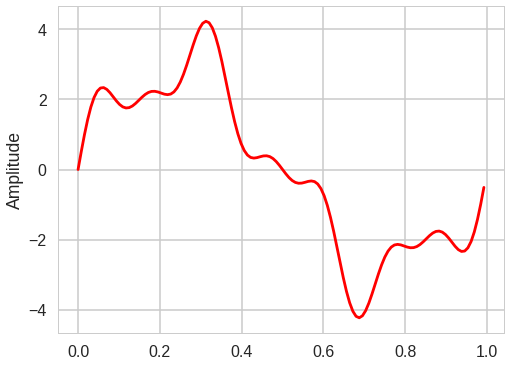

In [ ]:
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

<ipython-input-78-b37bcf2d7641>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, abs(X), 'b', \
<ipython-input-78-b37bcf2d7641>:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(f_oneside, abs(X_oneside), 'b', \


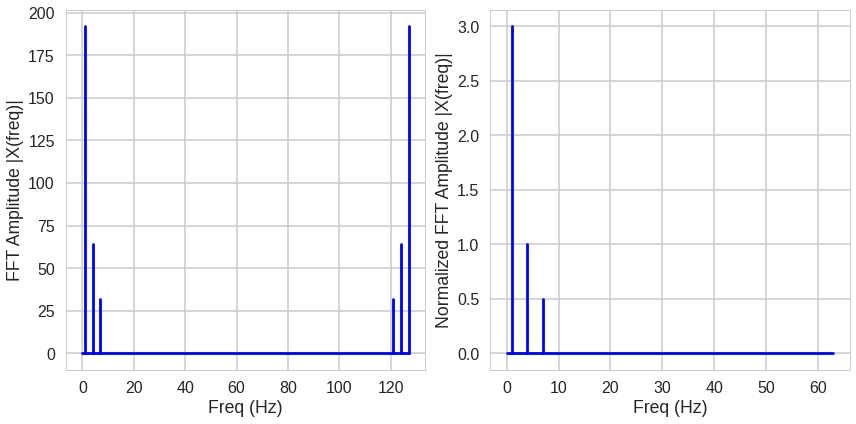

In [ ]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()